# To predict Optimum number of clusters for the given Iris Dataset using K-Means Clustering

In [31]:
#importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline


In [32]:
#loading the Dataset

iris=pd.read_csv('Iris.csv',index_col=0) 
iris.head() # See the first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


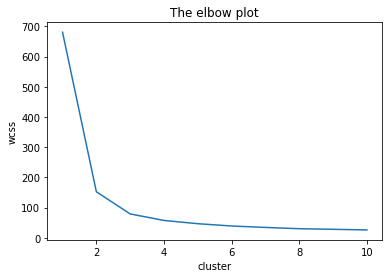

In [39]:
#finding optimum number of clusters
x=iris.iloc[0:, [0,1,2,3]].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#The elbow plot
plt.plot(range(1,11),wcss)
plt.title('The elbow plot')
plt.xlabel('cluster')
plt.ylabel('wcss')
plt.show()

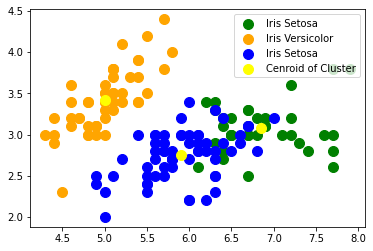

In [42]:
#Here as we can see the elbow  lies between 2 and 3 ,after 3 it does not have a significant change
#We will now consider the number of cluster as 3 and categorize the dataset

kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300, random_state=0)
y_predict=kmeans.fit_predict(x)

plt.scatter(x[y_predict==0,0], x[y_predict==0,1], s=100, c='green', label='Iris Setosa')
plt.scatter(x[y_predict==1,0], x[y_predict==1,1], s=100, c='orange', label='Iris Versicolor')
plt.scatter(x[y_predict==2,0], x[y_predict==2,1], s=100, c='blue', label='Iris Setosa')

#plotting centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Cenroid of Cluster')

plt.legend()